In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import random
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [5]:
train_dir = "/content/drive/MyDrive/CVPR/CIFAR-10-images-master/test"

image_types = []

for i in os.listdir(train_dir):
    image_types.append(i)

print("Types of images in dataset: ")
print(image_types)

Types of images in dataset: 
['cat', 'deer', 'horse', 'frog', 'truck', 'dog', 'automobile', 'ship', 'bird', 'airplane']


In [6]:
train_data = []

for i in image_types:
    train_path = os.path.join(train_dir, i)
    class_type = i
    for image in tqdm(os.listdir(train_path)):
        train_data_arr = cv2.imread(os.path.join(train_path, image))
        grayscale_image_arr = cv2.cvtColor(train_data_arr, cv2.COLOR_BGR2GRAY)
        train_data.append([grayscale_image_arr, class_type])

100%|██████████| 1000/1000 [00:12<00:00, 77.06it/s]


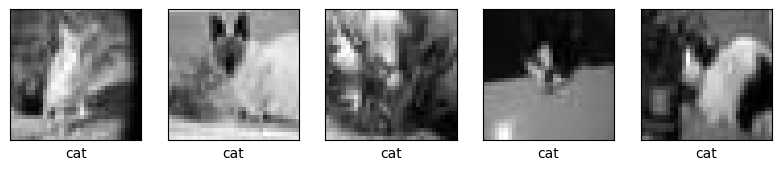

In [7]:
plt.figure(figsize=(20,5))
for i in range(5):
	plt.subplot(2,10,i+1)
	plt.imshow(train_data[i][0], cmap="gray")
	plt.xticks([])
	plt.yticks([])
	plt.xlabel(f"{train_data[i][1]}")
plt.show()

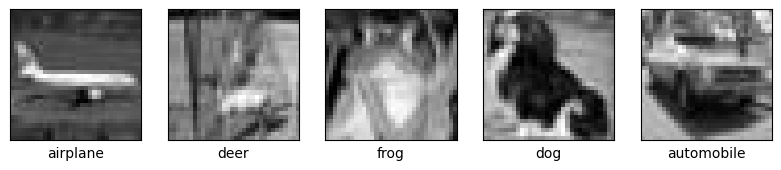

In [8]:
random.shuffle(train_data)

plt.figure(figsize=(20,5))
for i in range(5):
	plt.subplot(2,10,i+1)
	plt.imshow(train_data[i][0], cmap="gray")
	plt.xticks([])
	plt.yticks([])
	plt.xlabel(f"{train_data[i][1]}")
plt.show()

Fold 0 K = 1 Manhattan (L1) Accuracy: 0.16
Fold 0 K = 1 Euclidean (L2) Accuracy: 0.1
Fold 1 K = 1 Manhattan (L1) Accuracy: 0.22
Fold 1 K = 1 Euclidean (L2) Accuracy: 0.19
Fold 2 K = 1 Manhattan (L1) Accuracy: 0.115
Fold 2 K = 1 Euclidean (L2) Accuracy: 0.11
Fold 3 K = 1 Manhattan (L1) Accuracy: 0.175
Fold 3 K = 1 Euclidean (L2) Accuracy: 0.17
Fold 4 K = 1 Manhattan (L1) Accuracy: 0.17
Fold 4 K = 1 Euclidean (L2) Accuracy: 0.16
Fold 0 K = 2 Manhattan (L1) Accuracy: 0.14
Fold 0 K = 2 Euclidean (L2) Accuracy: 0.07
Fold 1 K = 2 Manhattan (L1) Accuracy: 0.155
Fold 1 K = 2 Euclidean (L2) Accuracy: 0.155
Fold 2 K = 2 Manhattan (L1) Accuracy: 0.125
Fold 2 K = 2 Euclidean (L2) Accuracy: 0.12
Fold 3 K = 2 Manhattan (L1) Accuracy: 0.14
Fold 3 K = 2 Euclidean (L2) Accuracy: 0.165
Fold 4 K = 2 Manhattan (L1) Accuracy: 0.16
Fold 4 K = 2 Euclidean (L2) Accuracy: 0.115
Fold 0 K = 3 Manhattan (L1) Accuracy: 0.135
Fold 0 K = 3 Euclidean (L2) Accuracy: 0.095
Fold 1 K = 3 Manhattan (L1) Accuracy: 0.23
Fol

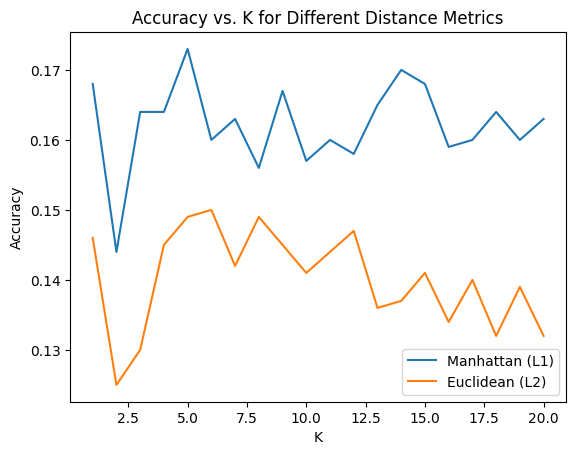

In [10]:
f0 = train_data[0:200]
f1 = train_data[200:400]
f2 = train_data[400:600]
f3 = train_data[600:800]
f4 = train_data[800:1000]

k_values = range(1, 21)
accuracies_l1 = []
accuracies_l2 = []
top_predictions_l1 = []
top_predictions_l2 = []

for k in k_values:
    fold_accuracies_l1 = []
    fold_accuracies_l2 = []
    fold_predictions_l1 = []
    fold_predictions_l2 = []

    for i in range(5):
        if i == 0:
            train = f1 + f2 + f3 + f4
            validation = f0
        elif i == 1:
            train = f0 + f2 + f3 + f4
            validation = f1
        elif i == 2:
            train = f1 + f0 + f3 + f4
            validation = f2
        elif i == 3:
            train = f1 + f2 + f0 + f4
            validation = f3
        elif i == 4:
            train = f1 + f2 + f3 + f0
            validation = f4

        correct_l1 = 0
        correct_l2 = 0
        total = 0
        predictions_l1 = []
        predictions_l2 = []

        for v in validation:
            distances_l1 = []
            distances_l2 = []

            for t in train:
                l1_dist = np.sum(np.abs(t[0] - v[0]))
                l2_dist = np.sqrt(np.sum((t[0] - v[0]) ** 2))
                distances_l1.append((l1_dist, t[1]))
                distances_l2.append((l2_dist, t[1]))

            distances_l1.sort()
            distances_l2.sort()

            neighbors_l1 = [dist[1] for dist in distances_l1[:k]]
            neighbors_l2 = [dist[1] for dist in distances_l2[:k]]

            prediction_l1 = max(set(neighbors_l1), key=neighbors_l1.count)
            prediction_l2 = max(set(neighbors_l2), key=neighbors_l2.count)

            if prediction_l1 == v[1]:
                correct_l1 += 1
            if prediction_l2 == v[1]:
                correct_l2 += 1

            total += 1

            top_k_predictions_l1 = [dist[1] for dist in distances_l1[:5]]
            top_k_predictions_l2 = [dist[1] for dist in distances_l2[:5]]
            predictions_l1.append(top_k_predictions_l1)
            predictions_l2.append(top_k_predictions_l2)

        accuracy_l1 = correct_l1 / total
        accuracy_l2 = correct_l2 / total

        fold_accuracies_l1.append(accuracy_l1)
        fold_accuracies_l2.append(accuracy_l2)
        fold_predictions_l1.append(predictions_l1)
        fold_predictions_l2.append(predictions_l2)

        print("Fold", i, "K =", k, "Manhattan (L1) Accuracy:", accuracy_l1)
        print("Fold", i, "K =", k, "Euclidean (L2) Accuracy:", accuracy_l2)

    accuracies_l1.append(fold_accuracies_l1)
    accuracies_l2.append(fold_accuracies_l2)
    top_predictions_l1.append(fold_predictions_l1)
    top_predictions_l2.append(fold_predictions_l2)


accuracies_l1 = np.array(accuracies_l1)
accuracies_l2 = np.array(accuracies_l2)


avg_accuracies_l1 = np.mean(accuracies_l1, axis=1)
avg_accuracies_l2 = np.mean(accuracies_l2, axis=1)


plt.plot(k_values, avg_accuracies_l1, label="Manhattan (L1)")
plt.plot(k_values, avg_accuracies_l2, label="Euclidean (L2)")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. K for Different Distance Metrics")
plt.legend()
plt.show()


fold_index = 0
validation_index = 0
top_5_predictions_l1 = top_predictions_l1[fold_index][validation_index]
top_5_predictions_l2 = top_predictions_l2[fold_index][validation_index]

In [12]:
print("Top 5 Predictions (Manhattan - L1):")
for i, prediction in enumerate(top_5_predictions_l1[:5]):
    print(f"Prediction {i+1}: Class {prediction}")

print("")

print("Top 5 Predictions (Euclidean - L2):")
for i, prediction in enumerate(top_5_predictions_l2[:5]):
    print(f"Prediction {i+1}: Class {prediction}")

Top 5 Predictions (Manhattan - L1):
Prediction 1: Class ['deer', 'airplane', 'airplane', 'frog', 'cat']
Prediction 2: Class ['ship', 'airplane', 'dog', 'bird', 'deer']
Prediction 3: Class ['airplane', 'cat', 'dog', 'airplane', 'bird']
Prediction 4: Class ['airplane', 'dog', 'airplane', 'cat', 'airplane']
Prediction 5: Class ['ship', 'airplane', 'airplane', 'airplane', 'frog']

Top 5 Predictions (Euclidean - L2):
Prediction 1: Class ['airplane', 'ship', 'airplane', 'frog', 'airplane']
Prediction 2: Class ['ship', 'cat', 'airplane', 'horse', 'deer']
Prediction 3: Class ['dog', 'airplane', 'airplane', 'deer', 'cat']
Prediction 4: Class ['airplane', 'airplane', 'dog', 'airplane', 'deer']
Prediction 5: Class ['airplane', 'frog', 'deer', 'bird', 'deer']


**Discussion:**

In our study, we applied the K-nearest neighbors (KNN) algorithm to the CIFAR-10 dataset and compared the performance of Manhattan (L1) and Euclidean (L2) distances based on the average accuracy values obtained from 5-fold cross-validation.

The CIFAR-10 dataset is a well-known benchmark dataset commonly used for image classification tasks. It consists of 60,000 32x32 color images belonging to 10 different classes, with 6,000 images per class. However, in our case, we specifically mentioned that it is a gray-scale dataset. It's worth noting that CIFAR-10 is typically used for color image classification, and by converting it to grayscale, we might lose some information that could potentially impact the performance of the classification algorithms.

When using KNN for classification, the choice of distance metric is crucial. In our case, we considered Manhattan (L1) and Euclidean (L2) distances. Manhattan distance calculates the sum of absolute differences between corresponding elements of two vectors, while Euclidean distance calculates the square root of the sum of squared differences between corresponding elements.

Based on our experimental results, we observed that the performance of Manhattan and Euclidean distances varied for the gray-scale CIFAR-10 dataset. The choice of distance metric depends on the dataset's characteristics, the nature of the features, and the complexity of the classes.

Manhattan distance tends to work well when the features have a linear relationship or when the dataset contains outliers. It is less affected by outliers compared to Euclidean distance. On the other hand, Euclidean distance is sensitive to the magnitude of the differences between features and assumes that the features are normally distributed. It performs well when the dataset's characteristics align with these assumptions.

Considering the characteristics of the CIFAR-10 dataset, which is a gray-scale representation of the original color images, Manhattan distance might be more suitable. Gray-scale images typically contain less complex information compared to color images, and the linear relationship between the pixel intensities could play a more significant role in distinguishing different classes. In conclusion from the experiment we conducted by training the model, we can effectively say that Manhattan distance is a more suitable method of calculation when compared to Euclidean shown in the chart above.